In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as p
import pandas as pd
import numpy as np
from scipy import stats

## NN training plot

In [12]:
training_results = open("processed/train_data/construction_training_results.pkl", "rb")
training_results = p.load(training_results)
df = pd.DataFrame(training_results, columns=["training_loss"])

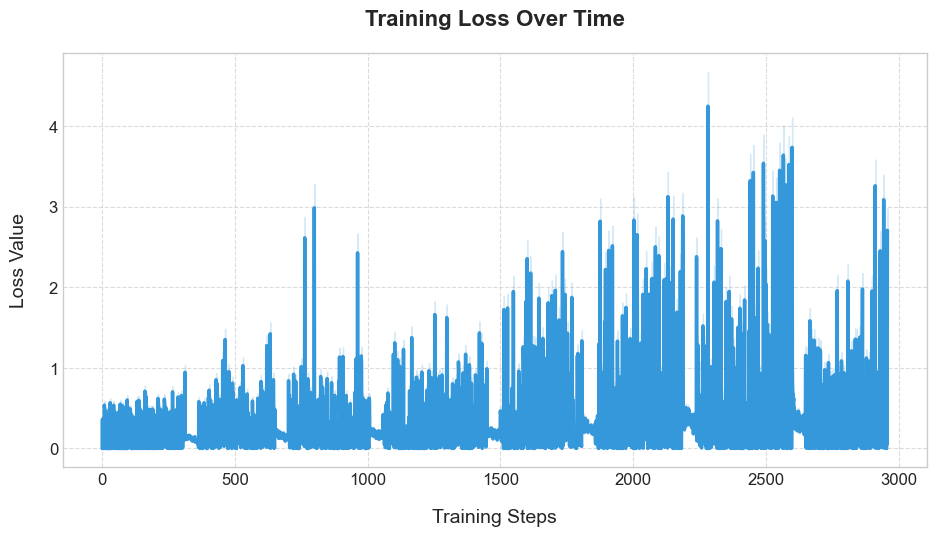

In [16]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')  # Modern grid style

# Create the plot with enhanced aesthetics
fig, ax = plt.subplots(figsize=(10, 6))  # Larger figure size

# Plot with improved styling
sns.lineplot(
    data=df, 
    x=df.index, 
    y="training_loss",
    linewidth=2.5,              # Thicker line
    color='#3498db',            # Nice blue color
    markeredgecolor='#3498db',  # Blue edge
    markeredgewidth=1.5         # Edge thickness
)

# Add shaded confidence region (for visual appeal)
y = df["training_loss"].values
x = df.index.values
plt.fill_between(
    x, 
    y - y*0.1,  # Lower bound
    y + y*0.1,  # Upper bound
    alpha=0.2,  # Transparency
    color='#3498db'
)

# Enhance the title, labels and appearance
plt.title("Training Loss Over Time", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Training Steps", fontsize=14, labelpad=15)
plt.ylabel("Loss Value", fontsize=14, labelpad=15)

# Improve the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a subtle grid to make data easier to read
ax.grid(True, linestyle='--', alpha=0.7)

# Tighten the layout and add a bit of padding
plt.tight_layout(pad=3.0)

# Add subtle border
for spine in ax.spines.values():
    spine.set_color('#cccccc')
    spine.set_linewidth(1)

plt.show()

## Evolution of RT proxy: number of goal choices

In [14]:
goal_choices = open("processed/train_data/train_goal_choices.pkl", "rb")
goal_choices = p.load(goal_choices)
# total 150 trials, if 6 sessiosns, 25 trials per session
np_goal_choices = np.array([len(g) for g in goal_choices])
df = pd.DataFrame(np_goal_choices, columns=["n_goal_choices"])

mean_df = np_goal_choices.reshape(6, 25)
mean_df = mean_df.mean(axis=1)
mean_df = pd.DataFrame(mean_df, columns=["n_goal_choices"])


In [ ]:
def plot_behavioural(df, label, x_label, y_label, title):
    # Set the style
    plt.style.use('seaborn-v0_8-whitegrid')

    # Create a figure with appropriate size
    fig, ax = plt.subplots(figsize=(10, 6))

    # Generate x values (indices)
    x = np.arange(len(df))

    # Get y values
    y = df[label].values

    # Calculate the line fit (linear regression)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line_fit = slope * x + intercept

    # Plot the scatter points
    sns.scatterplot(
        x=x, 
        y=y,
        s=100,                    # Size of points
        color='#9b59b6',          # Purple color for points
        alpha=0.7,                # Slight transparency
        edgecolor='white',        # White edges for cleaner look
        linewidth=1.5,            # Edge thickness
        ax=ax
    )

    # Plot the line fit
    plt.plot(
        x, 
        line_fit, 
        color='#e74c3c',          # Red line
        linewidth=2.5,            # Thicker line
        linestyle='--',           # Dashed line
        alpha=0.8                 # Slight transparency
    )

    # Add correlation coefficient annotation
    plt.annotate(f'r² = {r_value**2:.3f}', 
                xy=(0.05, 0.95), 
                xycoords='axes fraction',
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#cccccc", alpha=0.8))

    # Add shaded confidence region around the line fit
    plt.fill_between(
        x,
        line_fit - std_err * 2,   # Lower bound (2 standard errors)
        line_fit + std_err * 2,   # Upper bound (2 standard errors)
        alpha=0.2,                # Transparency
        color='#e74c3c'           # Red color matching the line
    )

    # Enhance the title and labels
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(x_label, fontsize=14, labelpad=15)
    plt.ylabel(y_label, fontsize=14, labelpad=15)

    # Improve tick labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add a gradient background for aesthetic appeal
    gradient = np.linspace(0, 1, 100).reshape(-1, 1)
    plt.rcParams['axes.facecolor'] = '#f8f9fa'  # Light gray background

    # Subtle border
    for spine in ax.spines.values():
        spine.set_color('#cccccc')
        spine.set_linewidth(1)

    # Tight layout with padding
    plt.tight_layout(pad=3.0)

    # Add text describing the trend
    if slope > 0:
        trend_text = "Positive trend"
    else:
        trend_text = "Negative trend"
        
    plt.figtext(
        0.5, 0.01, 
        f"{trend_text}: {slope:.4f} per index",
        ha="center", 
        fontsize=12, 
        bbox={"boxstyle":"round", "alpha":0.8, "ec":"#cccccc", "fc":"white"}
    )

    plt.show()

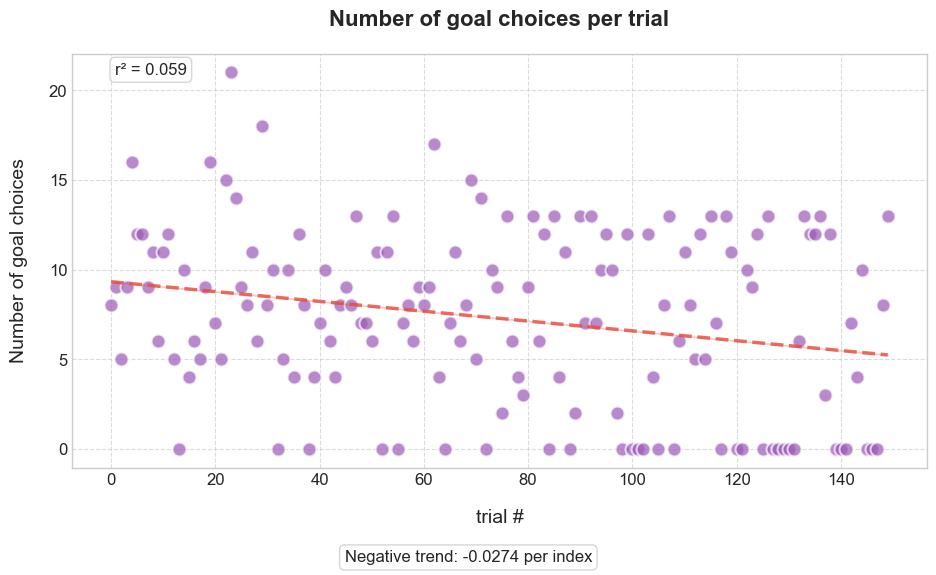

In [ ]:
plot_behavioural(df, label="n_goal_choices",
                 x_label="trial #", y_label="Number of goal choices", title="Number of goal choices per trial")

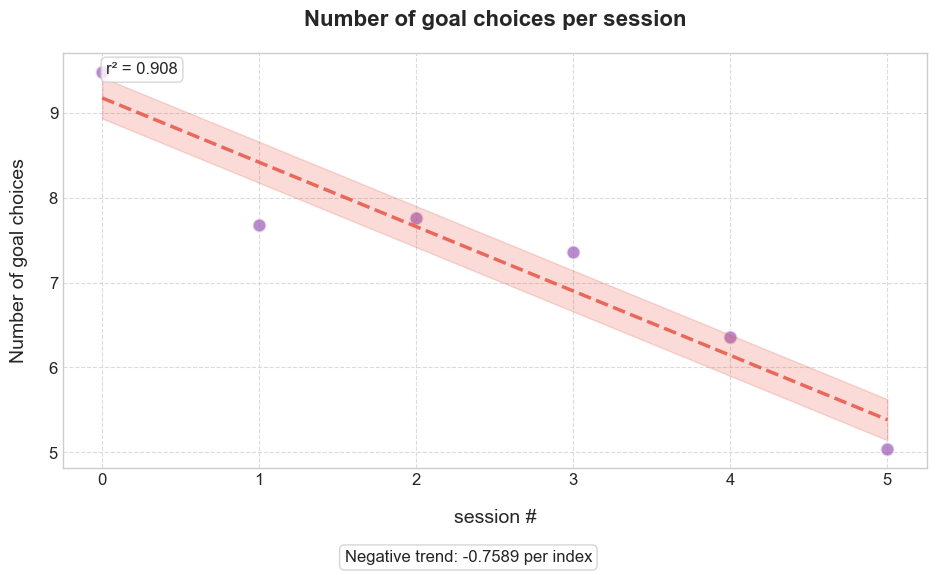

In [ ]:
plot_behavioural(mean_df, label="n_goal_choices",
                 x_label="session #", y_label="Number of goal choices", title="Number of goal choices per session")

## Construction correctness

In [8]:
correctness = open("processed/train_data/train_construction_correctness.pkl", "rb")
correctness = p.load(correctness)
# total 150 trials, if 6 sessiosns, 25 trials per session
np_correctness = np.array(correctness)
df = pd.DataFrame(np_correctness, columns=["n_correctness"])
mean_df = np_correctness.reshape(6, 25)
mean_df = mean_df.mean(axis=1)
mean_df = pd.DataFrame(mean_df, columns=["n_correctness"])

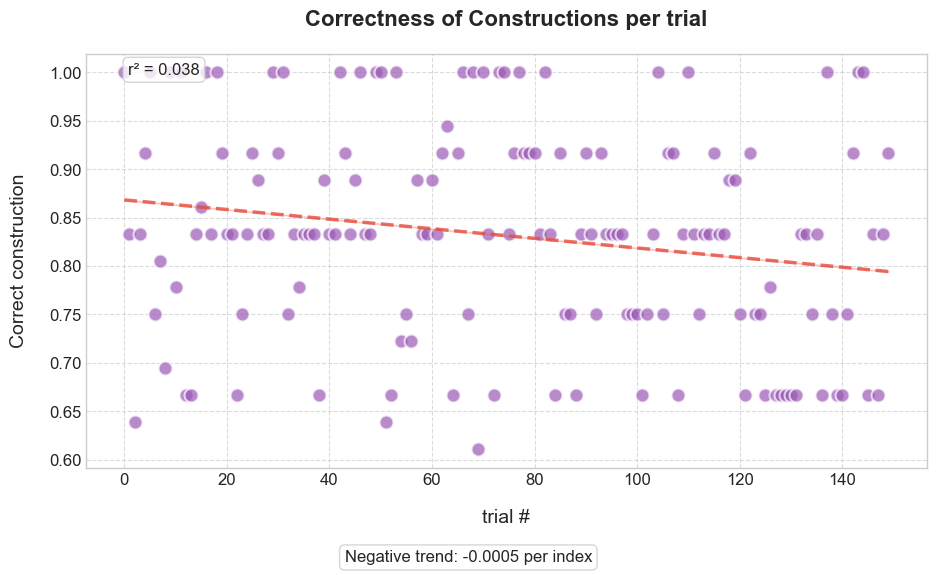

In [ ]:
plot_behavioural(df, label="n_correctness", 
                 x_label="trial #", y_label="Correct construction", title="Correctness of Constructions per trial")

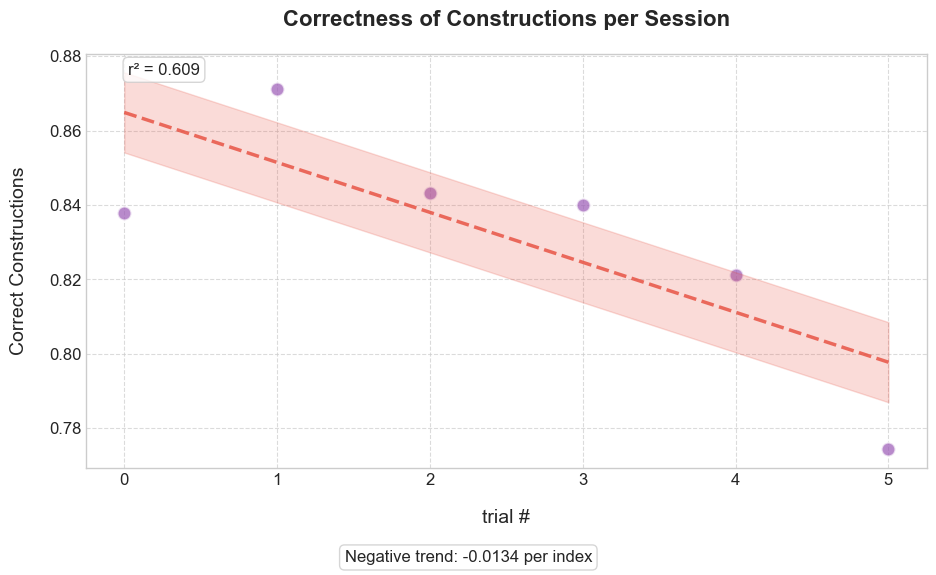

In [ ]:
plot_behavioural(mean_df, label="n_correctness", 
                 x_label="trial #", y_label="Correct Constructions", title="Correctness of Constructions per Session")